In [89]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [97]:
originalImage = './image.png'
extension = originalImage.split('.')[-1]
name = originalImage.split('.')[0]

In [91]:
imageOriginale = cv2.imread(originalImage)

In [92]:
#save RGB values from the image
image_rgb = cv2.cvtColor(imageOriginale, cv2.COLOR_BGR2RGB)
# r, g, b = cv2.split(imageOriginale)
r = image_rgb[:,:,0]
g = image_rgb[:,:,1]
b = image_rgb[:,:,2]


Dimension of the original te : (3741, 6650, 3)


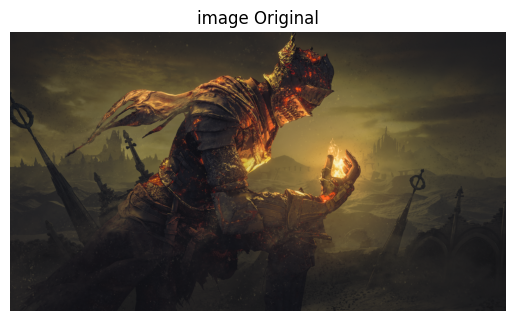

In [93]:
if imageOriginale is None:
    print("Error : No te")
print(f"Dimension of the original te : {image_rgb.shape}")
plt.imshow(image_rgb, cmap='gray')
plt.title('image Original')
plt.axis('off')
plt.show()


In [94]:
K = 50
# Fonction de compression et reconstruction
def compress_image(image,k):
    U, S, VT = np.linalg.svd(image)
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]
    return np.dot(U_k, np.dot(S_k, VT_k)), U,S,VT

image_gray = cv2.cvtColor(imageOriginale, cv2.COLOR_BGR2GRAY)
compressed_image,U,S,VT = compress_image(image_gray,K)


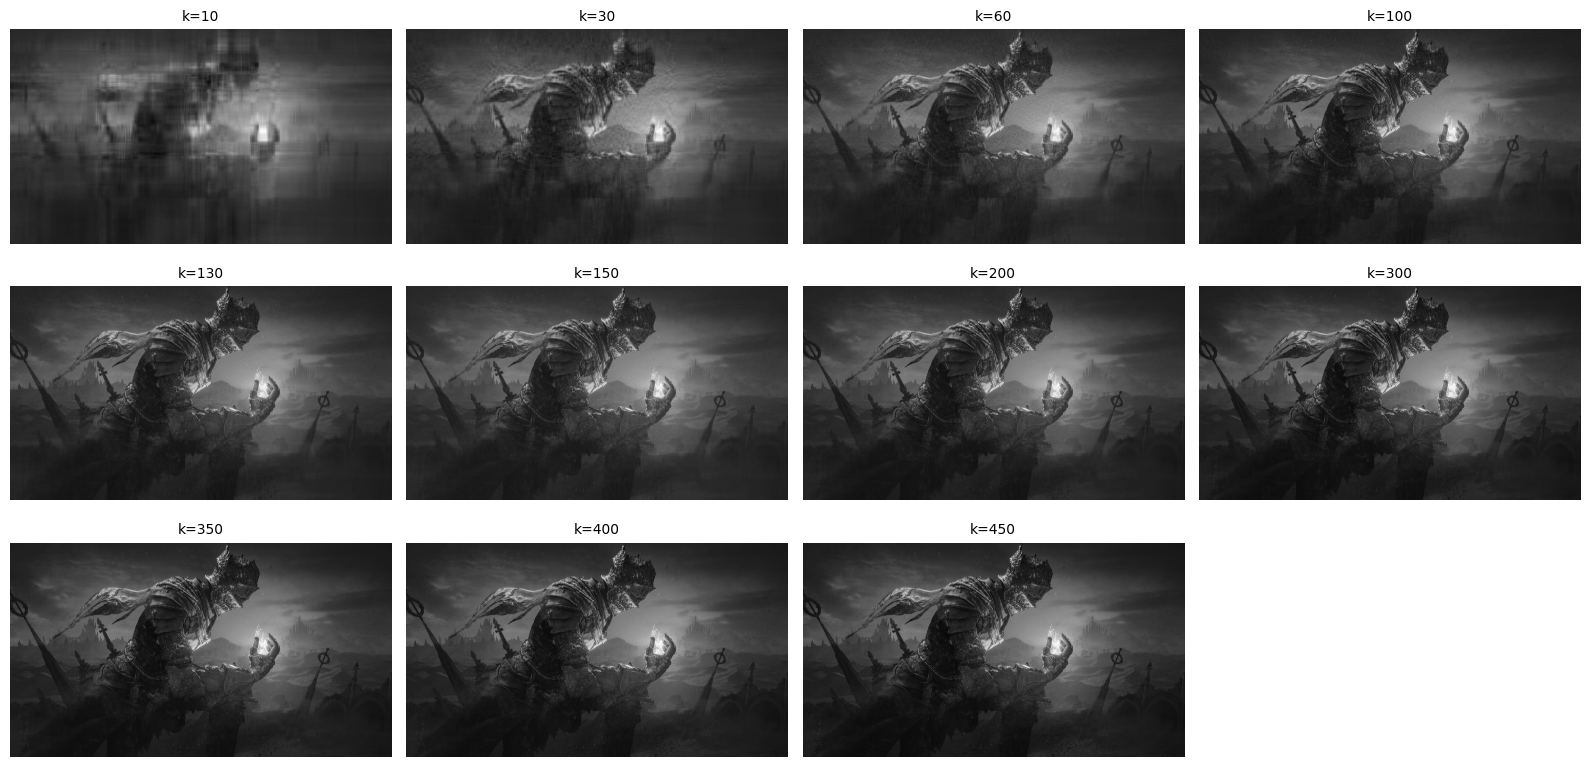

In [95]:
# Analyser les résultats pour différentes valeurs de k
k_values = [10, 30, 60, 100, 130, 150, 200, 300, 350, 400, 450]
plt.figure(figsize=(16, 8))
cols = 4
rows = int(np.ceil(len(k_values) / cols))

for i, k in enumerate(k_values):
    if k > min(image_gray.shape):
        break
    compressed,_,_,_ = compress_image(image_gray, k)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(compressed, cmap='gray')
    plt.title(f'k={k}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [98]:
#save the svd compression
np.savez_compressed(f'svd_compression_{name}_{K}k.npz', U=U[:, :k], S=np.diag(S[:k]), VT=VT[:k, :])

In [99]:
# size of initial image
image2 = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
print(f"Taille de l'image originale : {image2.nbytes} octets")

# size of compressed image u+ s + vt
print(f"Taille de l'image compressée : {U[:, :15].nbytes + S[:15].nbytes + VT[:15, :].nbytes} octets")

Taille de l'image originale : 24877650 octets
Taille de l'image compressée : 1247040 octets


Dimension de l'image compressée : (3741, 6650, 3)


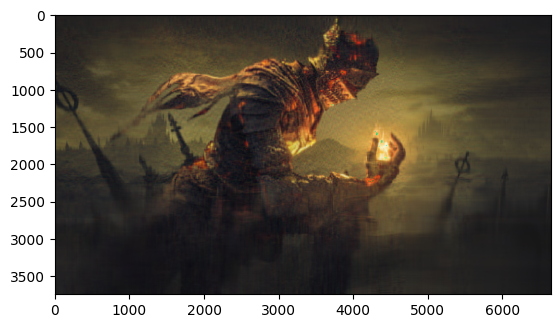

In [100]:
k=100
# compress all the r and g and b 
compressed_r, U_r, S_r, VT_r = compress_image(r, K)
compressed_g, U_g, S_g, VT_g = compress_image(g, K)
compressed_b, U_b, S_b, VT_b = compress_image(b, K)

# resample the image
r_resample = compressed_r.reshape(imageOriginale.shape[0], imageOriginale.shape[1])
g_resample = compressed_g.reshape(imageOriginale.shape[0], imageOriginale.shape[1])
b_resample = compressed_b.reshape(imageOriginale.shape[0], imageOriginale.shape[1])

# merge the r, g, b
compressed_image = cv2.merge([b_resample, g_resample, r_resample])
compressed_image = cv2.cvtColor(compressed_image.astype(np.uint8), cv2.COLOR_BGR2RGB)

print(f"Dimension de l'image compressée : {compressed_image.shape}")

plt.imshow(compressed_image)

In [101]:
compressed_image = cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB)
cv2.imwrite(f'compressed_image_{name}_{k}k.{extension}', compressed_image, [cv2.IMWRITE_JPEG_QUALITY, 85])

True